In [1]:
print("Hello world!")

Hello world!


In [2]:
import pandas as pd
import numpy as np
import time as tm

#Method to load excel with pandas
#loadDF = pd.read_excel("../CopiaDatosMATLAB.xlsx")
#Method to load excel with pandas
loadDF = pd.read_csv("../data sampled every 10th sec.csv", delimiter=';')
loadDF = loadDF.drop(loadDF.index[0:2])

In [3]:
#rename Columns
df = loadDF.rename(
    {
        'Cañuelas/Ezeiza #3 (S01)': 'Timestamp',
        'CFA10CE001/XE01':'Active Load',
        'MBA10AE005/XG01':'Variable Guide Vane',
        'MBA10CP010/XE01':'Compressor Inlet Pressure',
        'MBA10CP015/XE01':'Press Comp Outlet.1',
        'MBA10CP016/XE01':'Press Comp Outlet.2',
        'MBA10CP017/XE01':'Press Comp Outlet.3',
        'MBA10CP040/XE01':'Turbine Exhaust Diff Pressure.1',
        'MBA10CP041/XE01':'Turbine Exhaust Diff Pressure.2',
        'MBA10CP042/XE01':'Turbine Exhaust Diff Pressure.3',
        'MBA10CP045/XE01':'Turbine Exhaust Pressure',
        'MBA10CP065/XE01':'Air Intake Diff Pressure.1',
        'MBA10CP075/XE01':'Air Intake Diff Pressure.2',
        'MBA10CS005/XE01':'NT1 Rotor Speed',
        'MBA10CS010/XE01':'NT2 Rotor Speed',
        'MBA10CT025/XE01':'Compressor Inlet Temperature.1',
        'MBA10CT026/XE01':'Compressor Inlet Temperature.2',
        'MBA10CT027/XE01':'Compressor Inlet Temperature.3',
        'MBA10CT030/XE01':'Compressor Outlet Temperature.1',
        'MBA10CT031/XE01':'Compressor Outlet Temperature.2',
        'MBA10CT032/XE01':'Compressor Outlet Temperature.3',
        'MBA10CT100/XE01':'Exhaust Temperature 1.1',
        'MBA10CT100/XE02':'Exhaust Temperature 1.2',
        'MBA10CT100/XE03':'Exhaust Temperature 1.3',
        'MBA10CT105/XE01':'Exhaust Temperature 2.1',
        'MBA10CT105/XE02':'Exhaust Temperature 2.2',
        'MBA10CT105/XE03':'Exhaust Temperature 2.3',
        'MBA10CT110/XE01':'Exhaust Temperature 3.1',
        'MBA10CT110/XE02':'Exhaust Temperature 3.2',
        'MBA10CT110/XE03':'Exhaust Temperature 3.3',
        'MBA10CT115/XE01':'Exhaust Temperature 4.1',
        'MBA10CT115/XE02':'Exhaust Temperature 4.2',
        'MBA10CT115/XE03':'Exhaust Temperature 4.3',
        'MBA10CT120/XE01':'Exhaust Temperature 5.1',
        'MBA10CT120/XE02':'Exhaust Temperature 5.2',
        'MBA10CT120/XE03':'Exhaust Temperature 5.3',
        'MBA10CT125/XE01':'Exhaust Temperature 6.1',
        'MBA10CT125/XE02':'Exhaust Temperature 6.2',
        'MBA10CT125/XE03':'Exhaust Temperature 6.3',
        'MBA10CT130/XE01':'Exhaust Temperature 7.1',
        'MBA10CT130/XE02':'Exhaust Temperature 7.2',
        'MBA10CT130/XE03':'Exhaust Temperature 7.3',
        'MBA10CT135/XE01':'Exhaust Temperature 8.1',
        'MBA10CT135/XE02':'Exhaust Temperature 8.2',
        'MBA10CT135/XE03':'Exhaust Temperature 8.3',
        'MBA10CT140/XE01':'Exhaust Temperature 9.1',
        'MBA10CT140/XE02':'Exhaust Temperature 9.2',
        'MBA10CT140/XE03':'Exhaust Temperature 9.3',
        'MBA10CT145/XE01':'Exhaust Temperature 10.1',
        'MBA10CT145/XE02':'Exhaust Temperature 10.2',
        'MBA10CT145/XE03':'Exhaust Temperature 10.3',
        'MBA10CT150/XE01':'Exhaust Temperature 11.1',
        'MBA10CT150/XE02':'Exhaust Temperature 11.2',
        'MBA10CT150/XE03':'Exhaust Temperature 11.3',
        'MBA10CT155/XE01':'Exhaust Temperature 12.1',
        'MBA10CT155/XE02':'Exhaust Temperature 12.2',
        'MBA10CT155/XE03':'Exhaust Temperature 12.3',
        'MBA10CT160/XE01':'Exhaust Temperature 13.1',
        'MBA10CT160/XE02':'Exhaust Temperature 13.2',
        'MBA10CT160/XE03':'Exhaust Temperature 13.3',
        'MBA10CT165/XE01':'Exhaust Temperature 14.1',
        'MBA10CT165/XE02':'Exhaust Temperature 14.2',
        'MBA10CT165/XE03':'Exhaust Temperature 14.3',
        'MBA10CT170/XE01':'Exhaust Temperature 15.1',
        'MBA10CT170/XE02':'Exhaust Temperature 15.2',
        'MBA10CT170/XE03':'Exhaust Temperature 15.3',
        'MBA10CT175/XE01':'Exhaust Temperature 16.1',
        'MBA10CT175/XE02':'Exhaust Temperature 16.2',
        'MBA10CT175/XE03':'Exhaust Temperature 16.3',
        'MBA10FF900/XE01':'Turbine Inlet Massflow',
        'MBA10FT903/XE01':'Turbine Inlet Temperature (T52)',
        'MBA10FT910/ZE01':'T7 Exhaust Temp Average',
        'MBL30CM005/XE01':'Ambient Air Humidity',
        'MBL30CT005/XE01':'Ambient Air Temperature',
        'MBP10CT005/XE01':'Gas Fuel Temperature.1',
        'MBP10CT006/XE01':'Gas Fuel Temperature.2',
        'MBP10CT007/XE01':'Gas Fuel Temperature.3',
        'MKA10CE014/XE01':'Generator Power Factor',
        'MKY10CS010/XE01':'Generator Frequency'
    },  axis='columns')

In [4]:
#Delete columns useless
df = df.drop(
    ['BAC10GS101/XP01',
    'BAC10GS101/XP11',
    'Generator Power Factor', 
    'Generator Frequency',
    'Turbine Inlet Massflow',
    'NT1 Rotor Speed',
    'NT2 Rotor Speed']
     , axis=1)

for i in range (1,80):
    column = 'Cañuelas/Ezeiza #3 (S01).' + str(i)
    df = df.drop([column], axis=1)    

In [5]:
#Change types
#orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
df = df.applymap(lambda x: x.replace(',', '.'))
#df['Timestamp']= df[['Timestamp']].
df[df.columns[1:74]] = df[df.columns[1:74]].apply(pd.to_numeric, axis=0)

In [6]:
#Get AVG values to each group of characteristics
df['Press Comp Outlet'] = df[['Press Comp Outlet.1', 'Press Comp Outlet.2','Press Comp Outlet.3']].mean(axis=1)
df = df.drop(['Press Comp Outlet.1','Press Comp Outlet.2','Press Comp Outlet.3'],axis=1)
df['Turbine Exhaust Diff Pressure'] = df[['Turbine Exhaust Diff Pressure.1', 'Turbine Exhaust Diff Pressure.2','Turbine Exhaust Diff Pressure.3']].mean(axis=1)
df = df.drop(['Turbine Exhaust Diff Pressure.1','Turbine Exhaust Diff Pressure.2','Turbine Exhaust Diff Pressure.3'],axis=1)
df['Air Intake Diff Pressure'] = df[['Air Intake Diff Pressure.1', 'Air Intake Diff Pressure.2']].mean(axis=1)
df = df.drop(['Air Intake Diff Pressure.1', 'Air Intake Diff Pressure.2'],axis=1)
df['Compressor Inlet Temperature'] = df[['Compressor Inlet Temperature.1', 'Compressor Inlet Temperature.2', 'Compressor Inlet Temperature.3']].mean(axis=1)
df = df.drop(['Compressor Inlet Temperature.1', 'Compressor Inlet Temperature.2', 'Compressor Inlet Temperature.3'],axis=1)
df['Compressor Outlet Temperature'] = df[['Compressor Outlet Temperature.1', 'Compressor Outlet Temperature.2', 'Compressor Outlet Temperature.3']].mean(axis=1)
df = df.drop(['Compressor Outlet Temperature.1', 'Compressor Outlet Temperature.2', 'Compressor Outlet Temperature.3'],axis=1)
for i in range(1,17):
    name = 'Exhaust Tempeture ' + str(i)
    subname1 = 'Exhaust Temperature ' + str(i) + '.1'
    subname2 = 'Exhaust Temperature ' + str(i) + '.2'
    subname3 = 'Exhaust Temperature ' + str(i) + '.3'
    df[name] = df[[subname1, subname2, subname3]].mean(axis=1)
    df = df.drop([subname1, subname2, subname3], axis=1)
df['Gas Fuel Temperature'] = df[['Gas Fuel Temperature.1', 'Gas Fuel Temperature.2', 'Gas Fuel Temperature.3']].mean(axis=1)
df = df.drop(['Gas Fuel Temperature.1', 'Gas Fuel Temperature.2', 'Gas Fuel Temperature.3'],axis=1)


In [7]:
df.to_csv("../preprocessData.csv", sep =';')
df

,Timestamp,Active Load,Variable Guide Vane,Compressor Inlet Pressure,Turbine Exhaust Pressure,Turbine Inlet Temperature (T52),T7 Exhaust Temp Average,Ambient Air Humidity,Ambient Air Temperature,Press Comp Outlet,...,Exhaust Tempeture 8,Exhaust Tempeture 9,Exhaust Tempeture 10,Exhaust Tempeture 11,Exhaust Tempeture 12,Exhaust Tempeture 13,Exhaust Tempeture 14,Exhaust Tempeture 15,Exhaust Tempeture 16,Gas Fuel Temperature
2,2018-06-02 18:00:00.000,-0.056751,19.013666,102.588501,102.611710,4.956082,5.239058,73.043221,8.917938,0.002947,...,5.696366,4.046339,5.386825,3.022694,3.953689,5.181236,4.357751,6.494928,7.295675,30.932915
3,2018-06-02 18:00:10.000,-0.056776,19.001216,102.588535,102.611829,4.957172,5.238821,73.041410,8.917938,0.002956,...,5.694524,4.041771,5.387926,3.026288,3.953841,5.183515,4.358744,6.496103,7.297516,30.934317
4,2018-06-02 18:00:20.000,-0.056802,18.994504,102.588569,102.611948,4.958262,5.238584,73.031547,8.917938,0.002965,...,5.692682,4.037202,5.389028,3.029882,3.953992,5.185795,4.359737,6.497277,7.299357,30.935718
5,2018-06-02 18:00:30.000,-0.056827,18.994447,102.588603,102.612068,4.959352,5.238347,73.022732,8.918034,0.002974,...,5.690840,4.032633,5.390129,3.060582,3.954144,5.188074,4.360729,6.502792,7.301198,30.937120
6,2018-06-02 18:00:40.000,-0.056853,18.994391,102.588637,102.612187,4.960442,5.238109,73.019719,8.919843,0.002983,...,5.688998,4.028064,5.391231,3.170065,3.954295,5.190353,4.361722,6.521808,7.303039,30.938521
7,2018-06-02 18:00:50.000,-0.056878,18.994335,102.588671,102.612306,4.961532,5.237872,73.016705,8.921651,0.002992,...,5.687156,4.023495,5.392332,3.154543,3.954446,5.192632,4.362715,6.540823,7.304880,30.939923
8,2018-06-02 18:01:00.000,-0.056903,18.994278,102.588705,102.612426,4.962622,5.237635,73.015961,8.925057,0.003000,...,5.685314,4.018927,5.393434,3.139020,3.954598,5.194911,4.363707,6.559839,7.306720,30.941324
9,2018-06-02 18:01:10.000,-0.056929,18.994222,102.588739,102.612545,4.963712,5.237398,73.017620,8.929312,0.003009,...,5.683473,4.014358,5.394535,3.123498,3.954749,5.197190,4.364700,6.506695,7.308561,30.942726
10,2018-06-02 18:01:20.000,-0.056954,18.994166,102.588773,102.612665,4.964803,5.237160,73.020459,8.933567,0.003018,...,5.683631,4.025914,5.395637,3.107976,3.954901,5.199469,4.365693,6.463661,7.310402,30.944127
11,2018-06-02 18:01:30.000,-0.056980,18.994109,102.588807,102.612784,4.965893,5.236923,72.978867,8.937823,0.003027,...,5.685472,4.072474,5.396738,3.092453,3.955052,5.201748,4.366685,6.455350,7.312243,30.945529


In [8]:
# # Para borrar, este comando simplifica la visualización
# # df=df[df.columns[2:5]]

# numWindows = 0
# windowDF = pd.DataFrame()
# # Loop for streaming simulation (it must be changed to a FIFO heap with Python)
# for i in range (0,df.shape[0],3):
#     smallDF = df[i:i+3]
#     tm.sleep(0.5)
#     # smallDF forms the windowDF. When windowDF reaches treshold (30), we compute it
#     # and clean smallDF
#     # print(smallDF)

#     windowDF = windowDF.append(smallDF)
#     if windowDF.shape[0]==30:
#         print("Machine Learning Algorithm exec. ", numWindows+1)
#         smallDF=pd.DataFrame()
#         windowDF=pd.DataFrame()
#         numWindows += 1    

In [9]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn import preprocessing

#eliminamos la fecha para evitar problemas con PCA
df_dibujar = df.copy()
del df_dibujar['Timestamp']

# #Faltaria normalizar
df_normalized = preprocessing.normalize(df_dibujar, norm='l2')

x = df_dibujar.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_dibujar = pd.DataFrame(x_scaled)

# #PCA
# #Seleccionamos numero de componentes
pca = decomposition.PCA(n_components=3)
#Aplicamos PCA sobre un dataframe y la variable pca que ya contiene el numero de componentes
principalComponents = pca.fit_transform(df_dibujar)
#guardamos el resultado en un dataframe(principalDF)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# #visualizamos DF
#principalDF

# #Para ver el grado de variabilidad de las componentes elegidas
pca.explained_variance_ratio_

# #Visualizar los datos
#plt.scatter(componente X, componente Y, ...)
plt.scatter(principalDF[['PC1']], principalDF[['PC2']], principalDF[['PC3']])
#Etiquetas para los ejes
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
#Mostrar titulo de grafica
plt.title('About as simple as it gets, folks')
#Dibujar rejilla
plt.grid(True)
#Guardar grafica en imagen
#plt.savefig("test.png")
#mostrar grafica en notebook
plt.show()


c:\users\al_ko\appdata\local\programs\python\python36\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 1 Axes>

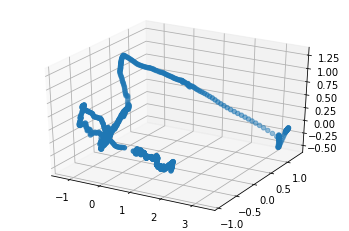

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(principalDF[['PC1']], principalDF[['PC2']], principalDF[['PC3']])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=50, max_iter=500)
kmeans.fit(principalDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.2293283 ,  0.19421834, -0.16881157],
       [ 1.35001185, -0.74290276, -0.03415416],
       [-0.28004361, -0.07866008,  0.78600962],
       [ 3.1868478 ,  1.15827844, -0.16949839]])

In [ ]:
labels = kmeans.labels_
labels

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
colors = ["g.","r.","b.","y."]

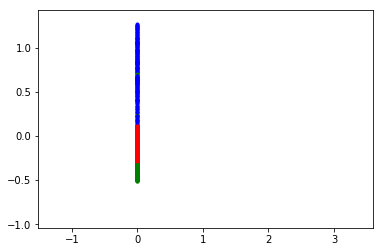

In [ ]:
for i in range(len(principalDF)):
    #print("coordinate:",principalDF['PC1'], "label:", labels[i])
    plt.plot(principalDF['PC1'][i],principalDF['PC2'][i],principalDF['PC3'][i], colors[labels[i]])
plt.show()   



c:\users\al_ko\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


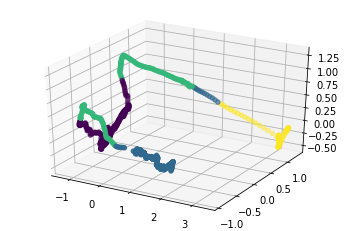

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection = '3d')


ax2.scatter(principalDF['PC1'], principalDF['PC2'], principalDF['PC3'], c = labels)
                
fig2.show()

In [ ]:
df.loc[:, 'Cluster'] = labels

In [ ]:
plt.scatter(df['Timestamp'], df['Active Load'], c = labels)

In [ ]:
#Load csv labeled by expert judgment
labeled = pd.read_csv("../labeled.csv", delimiter=';')

In [ ]:
#plot with scatter function(axis x, axis y, c = color by column)
plt.scatter(labeled['Timestamp'], labeled['Active Load'], c = labeled['Cluster'])

In [ ]:
# Applying KMeans to whole dataframe (32 dimensions)
kmeansWholeDF = KMeans(n_clusters=4)
kmeansWholeDF.fit(df_dibujar)

In [ ]:
labelsWDF = kmeansWholeDF.labels_

In [ ]:
df.loc[:, 'ClusterWDF'] = labelsWDF

In [ ]:
df.to_csv("../preprocessData.csv", sep =';')
# After check PCA Kmeans and WholeDataFrame Kmeans, WholeDataFrame Kmeans option is not worth it
# (we have a minimal reise of accuracy, and execution time grows considerably). On the other hand
# Kmeans is a very simple classifier, and it does not work properly with our data

In [ ]:
# As we know the clusters, we will train a classification algorithm (SVM)
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [ ]:
clf.fit(principalDF,labels)